# Importing Modules

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

# Loading dataset

In [2]:

dataset = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"


home_data = pd.read_csv(dataset, usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


# Visualize the Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

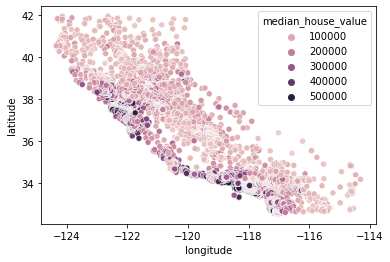

In [3]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

# Split the data for Training and Testing

In [4]:
# OVER HERE --> X --> home_data[['latitude', 'longitude']]
# Y---> home_data[['median_house_value']]

X_train, X_test, y_train, y_test = (
                                        train_test_split(
                                        home_data[['latitude', 'longitude']], 
                                        home_data[['median_house_value']], 
                                        test_size=0.33, 
                                        random_state=0)
                                   )

# Normalize the data

When working with distance-based algorithms, like k-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training. For example, if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables. 

In [5]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Fitting and Evaluating the Model

For the first iteration, we will arbitrarily choose a number of clusters (referred to as k) of 3. Building and fitting models in sklearn is very simple. We will create an instance of KMeans, define the number of clusters using the n_clusters attribute, set n_init, which defines the number of iterations the algorithm will run with different centroid seeds, to “auto,” and we will set the random_state to 0 so we get the same result each time we run the code.  We can then fit the model to the normalized training data using the fit() method.

In [6]:

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

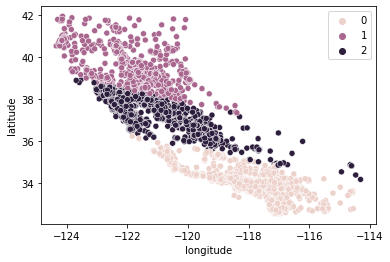

In [7]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot. 

<AxesSubplot:ylabel='median_house_value'>

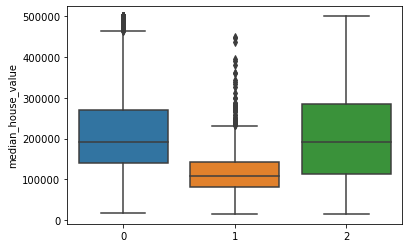

In [8]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

**We can evaluate performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit**

In [9]:
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

# Choosing the best number of clusters

In [10]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<AxesSubplot:>

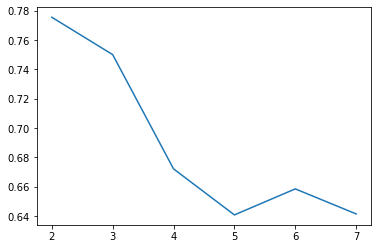

In [11]:
sns.lineplot(x = K, y = score)

# k = 5

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

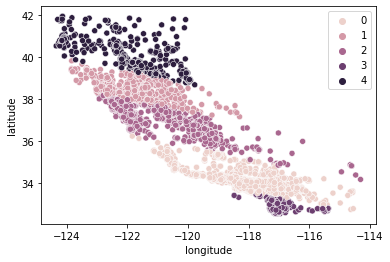

In [12]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<AxesSubplot:ylabel='median_house_value'>

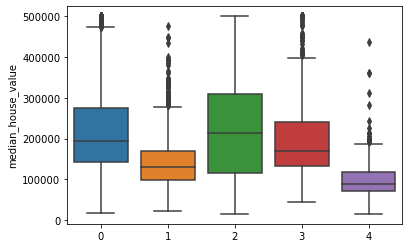

In [13]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

# k = 7

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

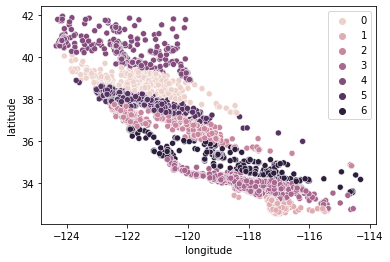

In [16]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

<AxesSubplot:ylabel='median_house_value'>

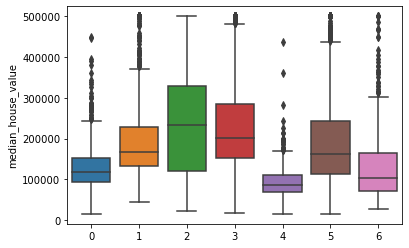

In [17]:
sns.boxplot(x = fits[5].labels_, y = y_train['median_house_value'])